# COGS 118A - Final Project

# Sentiment Analysis of Amazon Reviews

## Group members

- Amy Hardy
- Dina Dehaini
- Stephanie Kwan
- Darren Wu
- Nicholas Hale

# Abstract

Sentiment analysis can help business owners process huge amounts of feedback from reviewers and automatically tag them. In our project, we will implement sentiment analysis on over 500k Amazon reviews and attempt to accurately tag/predict reviews based on the actual text of the review. Labels will be derived from their ratings with ratings of 4-5 being positive, 3 neutral, and 1-2 negative. We will also attempt the regression task of predicting a rating between the continuous range of 1 and 5 stars using the review.  We will preprocess the text data through the typical means of removing stop words, stemming, lemmatization, tokenization, and vectorization. Next, an SVM, random forest classifier, and logistic regression model will be trained on the extracted features and evaluated on the remaining data with performance being measured through each model's accuracy in predicting both the labels and the ratings.

# Background

Sentiment Analysis is a powerful method for corporations and other organizations to analyze text for a variety of purposes. Sentiment analysis can be defined as the procedure of utilizing natural language processing, text analysis, and other metrics to determine the tonality of a body of text.<a name="one"></a>[<sup>[1]</sup>](#one) When utilized normally, the polarity of analyzed text is separated into categorizations, such as ‘Positive’, ‘Negative’, and ‘Neutral’<a name="four"></a>[<sup>[4]</sup>](#four).

The specific manners in which sentiment analysis can be utilized varies along a great range.	Sentiment analysis allows for a consistent metric to analyze text, and in the context of something such as product reviews, allows for the removal of unconscious bias in its analysis in addition to allowing for greater amounts of data to be processed. In a corporate context, sentiment analysis can be utilized to gain realtime insights into consumer opinions and satisfaction and allow for trends to be identified by a text’s polarity.

In the context of machine learning, there are a number of algorithms that can be used to analyze text, from Naive Bayes, Linear Regression, Support Vector Machines, neural networks, and more.<a name="two"></a>[<sup>[2]</sup>](#two)

Each model has challenges with their implementations, and there are general challenges with sentiment analysis itself in its current state. Text is very nuanced, and there are certain aspects of tone, sentence structure, slang, subjectivity, and more that cause for necessity of improvements upon current models to allow this tool to improve in accuracy.<a name="three"></a>[<sup>[3]</sup>](#three) With further research into this topic, it is possible to identify specific algorithms that allow for the most accuracy when performing sentiment analysis. Performing sentiment analysis on the same dataset multiple times while varying the models used will allow for one to identify which model provides the greatest accuracy for this specific type of data. Product reviews invite different language use by those submitting them than other forms of text, and as mentioned before, performing sentiment analysis on this form of data is largely beneficial to corporations and other parties that may be interested in consumer feedback.

# Problem Statement

The problem we will be tackling in this project is how to best classify reviews in terms of positive, neutral, and negative as well as in terms of rating. We want to compare how these two different kinds of outputs will perform, and to see which method will produce a better accuracy. We will implement an SVM, random forest classifier, and logistic regression based sentiment analysis model. Specifically, each model will take as input several training reviews and their ratings and then test its accuracy against several test reviews and their ratings by classifying the polarity of a given Amazon review and automatically tag it as positive, neutral, or negative, and also see if we can then give the review a rating. 

# Data

The dataset can be found at https://www.kaggle.com/datasets/jillanisofttech/amazon-product-reviews.
 
This dataset has a total of 568k customer reviews. Each review includes the following fields:
- ProductID: the id of the Amazon product
- UserID: the id of the Amazon user who is reviewing the product
- ProfileName: the profile name of the user who is reviewing the product
- HelpfulnessNumerator: number of people who found the review helpful
- HelpfulnessDenominator: number of people who did not find the review helpful
- Score: the rating the user is giving the product, on a scale of 1-5 stars
- Time: the timestamp that the review was posted at
- Summary: a short phrase that summarizes the review
- Text: the actual text of the review

For our project, we will be dropping most features besides the variables that contain text (customer reviews/summary) and rating. The UserID and ProfileName will provide no help in classifying a review’s sentiment, and neither will the timestamp. The values in the helpfulness numerator and denominator often match in each row, which makes their usage and meaning confusing, and overall we believe that the fields will not provide our model additional useful information. We plan to drop the summary field initially as well.

An additional column for classification will be made based on the score column –- numbers 1-2 will be -1 for “negative”, 3 will be 0 for “neutral”, and 4-5 will be 1 for “positive” in the new classification column. The reviews and summary will undergo text preprocessing and vectorization before their use in training the models.

## Cleaned Data
Due to the size of the original CSV file being ~300MB, we had to split it into 4 separate, smaller CSV files so that we could use GitHub. We then wrote a function to retrieve and merge these files together and return the completed dataset.

## EDA

In [1]:
import import_ipynb
import os
import sys

module_path = os.path.abspath(os.path.join('.'))
if module_path not in sys.path:
    sys.path.append(module_path)

import numpy as np

from wordcloud import WordCloud
import matplotlib.pyplot as plt

from utilities.UtilityFunctions import retrieve_processed_reviews_df, results_conf_matrix, model_metrics

importing Jupyter notebook from c:\Users\User\Documents\GitHub\Group027-Sp22\utilities\UtilityFunctions.ipynb


We used a separate Jupyter Notebook that contains several utility functions such that all the models are using the same data and functions for retrieving the processed data. This file can be found in [`./utilities/UtilityFunctions.ipynb`](https://github.com/COGS118A/Group027-Sp22/blob/main/utilities/UtilityFunctions.ipynb). This makes it easy to make changes to the processing pipeline when needed. The following cell is the culmination of those functions. It retrieves and stitches together a DataFrame from multiple CSV files which contain the preprocessed and text processed data.

In [2]:
reviews_df = retrieve_processed_reviews_df()
reviews_df.head()

./processed_data
Concatenating ./processed_data\processed_data-1.csv
Concatenating ./processed_data\processed_data-2.csv
Concatenating ./processed_data\processed_data-3.csv
Concatenating ./processed_data\processed_data-4.csv
Concatenating ./processed_data\processed_data-5.csv


,Id,Score,Summary,Text,Sentiment,Clean_text
0,1,5,Good Quality Dog Food,I have bought several of the Vitality canned d...,1,i bought several vitality canned products foun...
1,2,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1,product arrived labeled jumbo salted peanutsth...
2,3,4,"""Delight"" says it all",This is a confection that has been around a fe...,0,this confection around centuries it light pill...
3,4,2,Cough Medicine,If you are looking for the secret ingredient i...,-1,if looking secret ingredient robitussin i beli...
4,5,5,Great taffy,Great taffy at a great price. There was a wid...,1,great great price there wide assortment yummy ...


Taking a closer look at the data, we can see it's heavily skewed and we have a disportionate number of positive reviews. This may impact our model's ability to accurately predict negative review or neutral reviews. This in turn could lead to a higher true positive rate but also a higher false positive rate meaning we'd have a more sensitive and specific model. 

<BarContainer object of 3 artists>

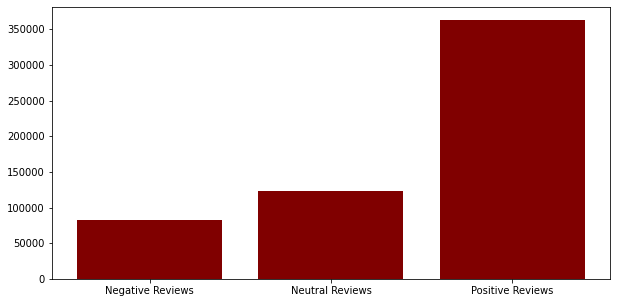

In [3]:
neg = len(reviews_df.loc[reviews_df['Sentiment'] == -1]['Text'])
neut = len(reviews_df.loc[reviews_df['Sentiment'] == 0]['Text'])
pos = len(reviews_df.loc[reviews_df['Sentiment'] == 1]['Text'])

h = ['Negative Reviews', 'Neutral Reviews', 'Positive Reviews']
vals = [neg,neut,pos]

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(h, vals, color ='maroon')

We also used wordclouds to look at some of the more frequent words based on their sentiment label for both the "Clean_text" column. From these plots we can see another potential issue: our model may start to associate neutral words with positive or negative sentiments. Because the products these reviews come from have a star rating and many of the reviews come from these same products, we are left with many reviews for the same product in the same sentiment category.

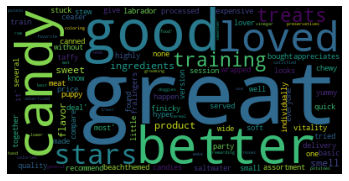

In [4]:
text = reviews_df.loc[reviews_df['Sentiment'] == 1]['Clean_text'].values 

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

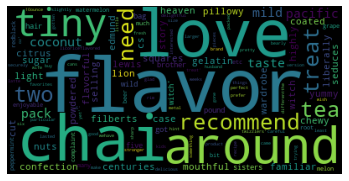

In [5]:
text = reviews_df.loc[reviews_df['Sentiment'] == 0]['Clean_text'].values 

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

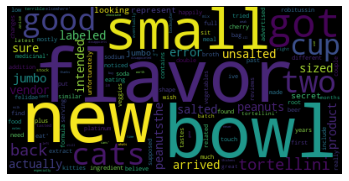

In [6]:
text = reviews_df.loc[reviews_df['Sentiment'] == -1]['Clean_text'].values 

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Proposed Solution

Before feeding the data to any of our models, we preprocessed, text processed, and vectorized our dataset using scikit-learn's CountVectorizer and TfidfVectorizer classes.

**Support Vector Machine**: SVM is a supervised learning algorithm that can be used for both classification and regression. The algorithm is based on identifying a hyperplane that best separates the data into classes and maximizes the separation boundaries between the data points.<a name="five"></a>[<sup>[5]</sup>](#five) The hyperplane is constructed by transforming the data with kernels, which can be linear, sigmoid, polynomial, etc. Because SVM in its simplest form supports binary classification, we will be implementing multiclass SVM (either one vs. one, one vs. all, or directed acyclic graph approach). These involve breaking down the classification into multiple binary classification cases. We plan to use scikit-learn's SVM class in our implementation.

**Random Forest Classifier**: RFC is a supervised learning algorithm that can be used for both classification and regression. The algorithm is based on creating several decision trees, which helps in preventing overfitting.<a name="six"></a>[<sup>[6]</sup>](#six) All these trees, when acting together, outperforms any individual tree, a reason we chose this over just a decision tree. When performing classification, it picks the class chosen by the most trees. When performing regression, it takes the averages of all the trees. We plan to use scikit-learn's RandomForestClassifier class in our implementation.

**Logistic Regression**: Logistic Regression is a supervised learning algorithm that can be used for classification.<a name="seven"></a>[<sup>[7]</sup>](#seven) While the name is logistic regression, we are planning to use the multinomial version of logistic regression since we have 3 outcomes for the labels(-1, 0, 1) instead of only 2, which is required for regular logistic regression. Since it is only a classifier, the ratings will be used as a categorical variable rather than a continuous variable just for this model. We plan to use scikit-learn's LogisticRegression class in our implementation.

**Ordinal Regression**: Ordinal Regression is a supervised learning algorithm with both classification and metric regression properties <a name="eight"></a>[<sup>[8]</sup>](#eight) used to predict ordinal variables or variables whose values are ordered making it an attractive solition for classification problems where the classifiers are ordered such as ours. Because the possible labels our model could predict include negative (-1), neutral (0), and positive (1), they can be considered ordinal as they are dependent in terms of their ordering: negative < neutral < positive. We believe this may improve our model's performance rather than treating the labels as just categorical variables. 

Each of these aforedescribed models will be used twice, once when the classifiers are labels (ie -1, 0, 1 for negative, neutral, and positive) and once when the classifiers are continuous ratings (1-5). This means that each of them will be performing both classification and regression once each. All of the models can be found in the sklearn Python library, which we will be using.<a name="nine"></a>[<sup>[9]</sup>](#nine)

To test the models, we will be initially shuffling the data and splitting it into training, validation, and test sets with a split ratio of 60-20-20. We will train the models using only the training set, and we will use the validation set as an intermediate dataset for evaluating the model’s performance as we tweak parameters. Finally we can use the test set to evaluate each of the model’s ability to generalize and accurately predict on unseen data in accordance with our evaluation metrics.

# Evaluation Metrics

Our models will be used to classify the reviews as negative, neutral, or positive – we will be using confusion matrices along with Accuracy, Recall, and Precision to analyze and compare to identify the best model.

|                    | Predicted Negative | Predicted Neutral  | Predicted Positive |
| ------------------ | ------------------ | ------------------ | ------------------ |
| Actual Negative    | True Negative      | Mispredict         | Mispredict         |
| Actual Neutral     | Mispredict         | True Neutral       | Mispredict         |
| Actual Positive    | Mispredict         | Mispredict         | True Positive      |

# Results

Each of our models were cultivated in the [`./models`](https://github.com/COGS118A/Group027-Sp22/tree/main/models) folder. There also lies the files of several other models we tried to see if we could get them to work. The code and graphs provided here are only a small part of everything we did, with many more in each of the corresponding Jupyter Notebooks. 

## Initial Preparation

In [7]:
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score

X = reviews_df['Clean_text']
y = reviews_df['Sentiment']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

## Support Vector Machine

### Hyper Parameter Tuning

In [ ]:
svm_pipe = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf', LinearSVC(random_state=42, max_iter=1000))])

param_grid = {
    'clf__C': [0.01, 0.1, 1]
}

grid_pipeline = GridSearchCV(svm_pipe, param_grid=param_grid, cv=3, n_jobs=-1)
grid_pipeline.fit(X_train, y_train)
grid_pipeline.best_params_

{'clf__C': 1}

### Final Optimal Pipeline

In [ ]:
svm_pipe = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf', LinearSVC(C = 1, random_state=42, max_iter=1000))])
svm_pipe.fit(X_train, y_train)
svm_pred = svm_pipe.predict(X_test)

### Pipeline Results

In [ ]:
results_conf_matrix(y_test, svm_pred)

![SVM_Confusion_Matrix](./images/svmconf.png)

In [ ]:
model_metrics(y_test, svm_pred)

![SVM_Metrics](./images/svmmetrics.png)

## Random Forest Classifier

### Hyper Parameter Tuning

In [ ]:
# find best n_estimators
scores = []
for k in range(1, 151):
    rfc_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf_randomForest", RandomForestClassifier(n_estimators=k, verbose=1))])
    rfc_pipe.fit(X_train, y_train)
    y_pred = rfc_pipe.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

rfc_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf_randomForest", RandomForestClassifier(n_estimators=23, verbose=1))])

# find best max_depth and max_features given best n_estimators
param_grid = {
    'clf_randomForest__max_depth' : [None, 2, 4, 6, 8],
    'clf_randomForest__max_features' : ["auto" , "sqrt" , "log2" , None],
    'clf_randomForest__n_estimators' : [23]
}

grid_pipeline = GridSearchCV(rfc_pipe, param_grid)
grid_pipeline.fit(X_train, y_train)
grid_pipeline.best_params_

### Final Optimal Pipeline

In [ ]:
rfc_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf_randomForest", RandomForestClassifier(n_estimators=23, max_depth = None, max_features= None, n_jobs=-1))])
rfc_pipe.fit(X_train, y_train)
rfc_pred = rfc_pipe.predict(X_test)

### Pipeline Results

In [ ]:
results_conf_matrix(y_test, rfc_pred)

In [ ]:
model_metrics(y_test, rfc_pred)

## Logistic Regression

### Hyper Parameter Tuning

In [ ]:
clf_logReg_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf_logReg", LogisticRegression(multi_class='multinomial',solver ='newton-cg'))])

param_grid = {
    "clf_logReg__C": [0.01, 0.5, 1, 10]
}

grid_pipeline = GridSearchCV(clf_logReg_pipe, param_grid = param_grid)
grid_pipeline.fit(X_train, y_train)
grid_pipeline.best_params_

### Final Optimal Pipeline

In [ ]:
clf_logReg_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf_logReg", LogisticRegression(multi_class='multinomial',solver ='newton-cg', C=10))])
clf_logReg_pipe.fit(X_train, y_train)
clf_logReg_pred = clf_logReg_pipe.predict(X_test)

### Pipeline Results

In [ ]:
results_conf_matrix(y_test, clf_logReg_pred)

![LogReg_Confusion_Matrix](./images/logregconf.png)

In [ ]:
model_metrics(y_test, clf_logReg_pred)

![LogReg_Metrics](./images/logregmetrics.png)

## Ordinal Regression

### Final Pipeline

### Pipeline Results

In [ ]:
results_conf_matrix(y_test, clf_logReg_pred)

In [ ]:
model_metrics(y_test, clf_logReg_pred)

# Discussion

## Interpreting the result

OK, you've given us quite a bit of tech informaiton above, now its time to tell us what to pay attention to in all that.  Think clearly about your results, decide on one main point and 2-4 secondary points you want us to understand. Highlight HOW your results support those points.  You probably want 2-5 sentences per point.

## Limitations

If we had more time, we would run more tests on hyperparameters for each model to get to a more optimal solution. The inbalance of sentiment labels in the data also could be fixed, we tried to use stratification sampling but it wasn't widely used enough. We removed many products names from our reviews, but a more thorough job could've led to cleaner more usable data. Another limitation we had was that we originally wanted to analyze our models with regression as well as classification, but we didn't have the time to get to regression.

## Ethics & Privacy

Some potential concerns with data privacy is that in the data itself there are user IDs and usernames that are easily associated with Amazon accounts. In order to address the issue of the data being attached to user IDs and usernames, we will be dropping those columns as they are also unnecessary to our analysis. The dataset also has a column meant to id each review, so we can use that column to identify a given review.

## Conclusion

Reiterate your main point and in just a few sentences tell us how your results support it. Mention how this work would fit in the background/context of other work in this field if you can. Suggest directions for future work if you want to.

# Footnotes

<a name="one"></a>1.[^](#one): Introduction to sentiment analysis: What is sentiment analysis? DataRobot AI Cloud. (2022, March 24). Retrieved April 24, 2022, from https://www.datarobot.com/blog/introduction-to-sentiment-analysis-what-is-sentiment-analysis/<br> 
<a name="two"></a>2.[^](#two): read, A. min, Finn Bartram·March 5, 2021·238 views, & views, 9 min read·15381. (2022, April 11). Is sentiment analysis machine learning? The CX Lead. Retrieved April 24, 2022, from https://thecxlead.com/topics/is-sentiment-analysis-machine-learnin g/
<a name="three"></a>3.[^](#three): Sentiment Analysis & Machine Learning. MonkeyLearn Blog. (2020, April 20). Retrieved April 24, 2022, from https://monkeylearn.com/blog/sentiment-analysis-machine-learning/
 <br> <a name="four"></a>4.[^](#four): Sentiment analysis. Papers With Code. (n.d.). Retrieved April 24, 2022, from https://paperswithcode.com/task/sentiment-analysis
 <br> 
<a name="five"></a>5.[^](#five): Reddy, V. (2020, June 23). Sentiment analysis using SVM. Medium. Retrieved April 24, 2022, from https://medium.com/@vasista/sentiment-analysis-using-svm-338d418e3ff1<br>
<a name="six"></a>6.[^](#six): Yiu, T. (2021, September 29). Understanding random forest. Medium. Retrieved April 24, 2022, from https://towardsdatascience.com/understanding-random-forest-58381e0602d2<br>
<a name="seven"></a>7.[^](#seven): Swaminathan, S. (2019, January 18). Logistic regression - detailed overview. Medium. Retrieved April 24, 2022, from https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303 <br>
<a name="eight"></a>8.[^](#eight): S. E. Saad and J. Yang, "Twitter Sentiment Analysis Based on Ordinal Regression," in IEEE Access, vol. 7, pp. 163677-163685, 2019, doi: 10.1109/ACCESS.2019.2952127. Retrieved May 17, 2022, from https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=8894084 <br> 
<a name="nine"></a>9.[^](#nine): Sucky, R. N. (2021, August 28). A complete sentiment analysis project using Python's Scikit-Learn. Medium. Retrieved April 24, 2022, from https://towardsdatascience.com/a-complete-sentiment-analysis-project-using-pythons-scikit-learn-b9ccbb040c2 <br> 